In [1]:
import pandas as pd
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
#%matplotlib inline
from itertools import islice
#import mpld3
#mpld3.enable_notebook()

In [45]:
'''File Manipulations, get rid of headers and footer length, get command part and scanning details part'''
folder = 'Allegro_txt/'   #raw_mapper_txt
#Test1_Allergo_0.txt  Test2_2_Allergo_+1.txt Test3_Allergo_+2.txt  Test4_Allergo_+3.txt
filename = 'Test7_Allergo_-3.txt'  #Boston_18_test3_18   BD_18_R_Test2_18
path =folder+ filename

f_obj=open(path)
f_lines=f_obj.readlines()
line_star=[]
i=0
for line in f_lines:
    i+=1
    if line[0]=='*':
        if len(line) == 425:  #length of star divider
            line_star.append(i)
print(line_star)

#with open(filename) as f_obj: 
#    head = list(islice(f_obj, 10))
#print(head)
#print('*******This is the test details**********\n')
#for i in np.arange(line_star[0],line_star[1]-1,1):
#    print(f_lines[i])

#print('*******This is the test command**********\n')
#for i in np.arange(0,line_star[0]-1,1):
#    print(f_lines[i])
last_line_header = line_star[1]+1
N_footer_line = line_star[3]-line_star[2]+2

[10, 32, 36048, 36541]


In [46]:
'''Generate Slice information and export to csv with just data'''
data = pd.read_csv(path, sep="\t", header=last_line_header,skipfooter=N_footer_line,engine='python')  
#header 32 means 0-32 33line remove
#data = pd.read_csv('txt/_(256).txt', sep="\t", header=30,skipfooter=152,engine='python')  #257 good #256 bad
data.columns=['Slice','Line','X [mm]','Y [mm]','Z [mm]','Rotation [deg]','Bx [mT]','By [mT]','Bz [mT]','Rot. Enc [steps]',
              'Bxy [mT]','Btot [mT]','Angle error [deg]','Direction','R [mm]','Z2 [mm]','Theta [deg]','Probe temp [°C]']
data['degz_xyplane (deg)']=np.arccos(data['Bxy [mT]']/data['Btot [mT]'])*180/np.pi
N_slice = len(data.Slice.unique())
print('This test has '+str(N_slice)+' slices with ' + str(len(data)/N_slice)+ 'points each')
#data.head()
data.to_csv('csv_out/'+filename+'.csv')

This test has 10 slices with 3601.0points each


In [47]:
N_unique=[len(data['X [mm]'].unique()),len(data['Y [mm]'].unique()),len(data['Z [mm]'].unique()),len(data['Rotation [deg]'].unique())]
#print(N_unique)
Direction_list=['X','Y','Z','R']
#dict_unqiue = dict(zip(Direction_list, N_unique))
#print(dict_unqiue) not good for search 

s_unique = pd.Series(N_unique,index=Direction_list)
print(s_unique)
print('This multiple slices is along the direction of: '+s_unique[s_unique==N_slice].index[0])

'''i=0
for value in N_unique:
    if value==N_slice:
        Direction = Direction_list[i]
print('This multiple slices is along the direction of: '+Direction)'''

X      10
Y       2
Z       1
R    3601
dtype: int64
This multiple slices is along the direction of: X


"i=0\nfor value in N_unique:\n    if value==N_slice:\n        Direction = Direction_list[i]\nprint('This multiple slices is along the direction of: '+Direction)"

In [48]:
s_unique['X']==N_slice+1

False

In [49]:
#create dataframe list for multiple slices
dataslices_df_list=[]
for i in np.arange(0,N_slice,1):
    dataslices_df_list.append(data.iloc[i*int(len(data)/N_slice):(i+1)*int(len(data)/N_slice)].copy(deep=False).reset_index(drop=True))
    print('This is slice with number of points: [index number of points]'+str(dataslices_df_list[i]['Slice'].value_counts()))
    if s_unique['X']==N_slice:
        print('This slice x axis position is: '+str(format(dataslices_df_list[i]['X [mm]'].values[0],'.5g'))+'\n')
    elif s_unique['Y']==N_slice:
        print('This slice y axis position is: '+str(format(dataslices_df_list[i]['Y [mm]'].values[0],'.5g'))+'\n')
    elif s_unique['Z']==N_slice:
        print('This slice z axis position is: '+str(format(dataslices_df_list[i]['Z [mm]'].values[0],'.5g'))+'\n')
    else:
        print('This slice R axis position is: '+str(format(dataslices_df_list[i]['Rotation [deg]'].values[0],'.5g'))+'\n')

if N_slice>1:
    if s_unique['X']==N_slice or s_unique['X']==N_slice+1 or s_unique['X']==N_slice-1:
        print('Distance between second and first slice along X is: '+
        str(format(dataslices_df_list[1]['X [mm]'].values[0]-dataslices_df_list[0]['X [mm]'].values[0],'.5g')))
    elif s_unique['Y']==N_slice:
        print('Distance between second and first slice along Y is: '+
        str(format(dataslices_df_list[1]['Y [mm]'].values[0]-dataslices_df_list[0]['Y [mm]'].values[0],'.5g')))
    elif s_unique['Z']==N_slice:
        print('Distance between second and first slice along Z is: '+
        str(format(dataslices_df_list[1]['Z [mm]'].values[0]-dataslices_df_list[0]['Z [mm]'].values[0],'.5g')))
    else:
        print('Distance between second and first slice along R is: '+
        str(format(dataslices_df_list[1]['Rotation [deg]'].values[0]-dataslices_df_list[0]['Rotation [deg]'].values[0],'.5g')))    

dataslices_df_list[0].head()
        
# wired to have two same columns when just ask to return one 
#data['Z [mm]'].values[0][0]

This is slice with number of points: [index number of points]1.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -51.231

This is slice with number of points: [index number of points]2.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -51.73

This is slice with number of points: [index number of points]3.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -52.232

This is slice with number of points: [index number of points]4.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -52.733

This is slice with number of points: [index number of points]5.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -53.231

This is slice with number of points: [index number of points]6.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -53.731

This is slice with number of points: [index number of points]7.0    3601
Name: Slice, dtype: int64
This slice x axis position is: -54.233

This is slice with number of

,Slice,Line,X [mm],Y [mm],Z [mm],Rotation [deg],Bx [mT],By [mT],Bz [mT],Rot. Enc [steps],Bxy [mT],Btot [mT],Angle error [deg],Direction,R [mm],Z2 [mm],Theta [deg],Probe temp [°C],degz_xyplane (deg)
0,1.0,1.0,-51.231,0.002,-26.033,0.0,-11.279,-25.459,0.487,-180218.000,27.846,27.850,NaN,R+,51.231,-26.033,0.0,22.052,0.971092
1,1.0,1.0,-51.231,0.002,-26.033,0.1,-9.016,-26.329,0.832,-180222.551,27.830,27.843,NaN,R+,51.231,-26.033,0.1,22.043,1.750928
2,1.0,1.0,-51.231,0.002,-26.033,0.2,-6.018,-27.108,1.373,-180227.102,27.768,27.802,NaN,R+,51.231,-26.033,0.2,22.053,2.833892
3,1.0,1.0,-51.231,0.002,-26.033,0.3,-3.578,-27.430,1.738,-180231.652,27.662,27.716,NaN,R+,51.231,-26.033,0.3,22.058,3.577172
4,1.0,1.0,-51.231,0.002,-26.033,0.4,0.248,-27.573,2.347,-180236.203,27.575,27.674,NaN,R+,51.231,-26.033,0.4,22.052,4.847846


In [50]:
#export slices image with same data name but different z axis number and columns you want to export
figfolder = 'Allegro_fig/' 
for i in np.arange(0,N_slice,1):
    plt.figure(figsize=(15,15))
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
    plt.rc('font', **font)
    lines = plt.plot(dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['Bx [mT]'],'--',
         dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['By [mT]'],'-.',
         dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['Bz [mT]'],'-',label='slice '+str(i))
    plt.ylabel('Magnetic Field[mT]')
    plt.xlabel('Rotation (deg)')
    plt.setp(lines, linewidth=5)
    plt.legend(['Bx','By','Bz'],loc='best')
    # Title for Bz e.g. Boston Dynamics
    #title='slice '+str(i+1)+'z~'+str(format(dataslices_df_list[i]['Z [mm]'].values[0],'.5g')+' mm')+\
    #' Bzmax~'+str(format(max(dataslices_df_list[i]['Bz [mT]']),'.3g'))+\
    #                      '(mT) Bzmin~'+str(format(min(dataslices_df_list[i]['Bz [mT]']),'.3g'))+'(mT)'+\
    #   ' Sum(Bz)~'+ str(format(sum(dataslices_df_list[i]['Bz [mT]']),'.3g'))
    #plt.text(0,130,filename+' Sum(Bz):' +str(format(sum(dataslices_df_list[i]['Bz [mT]']),'.3g'))+'(mT)')
    
    title='slice '+str(i+1)+'x~'+str(format(dataslices_df_list[i]['X [mm]'].values[0],'.5g')+' mm')+\
    ' Bxmax~'+str(format(max(dataslices_df_list[i]['Bx [mT]']),'.3g'))+\
                          '(mT) Bxmin~'+str(format(min(dataslices_df_list[i]['Bx [mT]']),'.3g'))+'(mT)'+\
       ' P2P(Bx)~'+ str(format(max(dataslices_df_list[i]['Bx [mT]'])-min(dataslices_df_list[i]['Bx [mT]']),'.3g'))+'(mT)'
    
    print(title)
    plt.title(title)
    plt.savefig(figfolder+filename+title+'.png')



C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


slice 1x~-51.231 mm Bxmax~27.9(mT) Bxmin~-29.6(mT) P2P(Bx)~57.5(mT)
slice 2x~-51.73 mm Bxmax~15(mT) Bxmin~-16(mT) P2P(Bx)~31(mT)
slice 3x~-52.232 mm Bxmax~7.98(mT) Bxmin~-8.55(mT) P2P(Bx)~16.5(mT)
slice 4x~-52.733 mm Bxmax~4.31(mT) Bxmin~-4.59(mT) P2P(Bx)~8.9(mT)
slice 5x~-53.231 mm Bxmax~2.39(mT) Bxmin~-2.5(mT) P2P(Bx)~4.89(mT)
slice 6x~-53.731 mm Bxmax~1.37(mT) Bxmin~-1.39(mT) P2P(Bx)~2.76(mT)
slice 7x~-54.233 mm Bxmax~0.827(mT) Bxmin~-0.779(mT) P2P(Bx)~1.61(mT)
slice 8x~-54.731 mm Bxmax~0.529(mT) Bxmin~-0.457(mT) P2P(Bx)~0.986(mT)
slice 9x~-55.232 mm Bxmax~0.378(mT) Bxmin~-0.292(mT) P2P(Bx)~0.67(mT)
slice 10x~-55.73 mm Bxmax~0.288(mT) Bxmin~-0.188(mT) P2P(Bx)~0.476(mT)


In [ ]:
#                      Stop               #
#export merged multiple slices image with same data name but different z axis number and columns export BxByBz same slice
for i in np.arange(0,N_slice,1):
    plt.figure(figsize=(15,15))
    font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
    plt.rc('font', **font)
    lines = plt.plot(dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['Bx [mT]'],'--',
         dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['By [mT]'],'-.',
         dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['Bz [mT]'],'-',label='slice '+str(i))
    plt.ylabel('Magnetic Field[mT]')
    plt.xlabel('Rotation (deg)')
    plt.setp(lines, linewidth=5)
    plt.legend(['Bx','By','Bz'],loc='best')
    title = 'slice '+str(i+1)+' with z axis position '+str(format(dataslices_df_list[i]['Z [mm]'].values[0][0],'.5g')+' mm')
    plt.title(title)
    plt.savefig('figure/'+filename+title+'.png')

#export merged multiple slices image with same data name but different z axis number and columns export BxByBz same slice
from itertools import cycle
plt.figure(figsize=(15,15))
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
for i in np.arange(0,N_slice,1):
    line=plt.plot(dataslices_df_list[i]['Rotation [deg]'],dataslices_df_list[i]['Bx [mT]'],next(linecycler))
    


    plt.ylabel('Magnetic Field Bx[mT]')
    plt.xlabel('Rotation (deg)')
    plt.setp(line, linewidth=5)
    plt.legend('slice '+str(i+1),loc='best')
    #title = 'slice '+str(i+1)+' with z axis position '+str(format(dataslices_df_list[i]['Z [mm]'].values[0][0],'.5g')+' mm')
    #plt.title(title)
    #plt.savefig('figure/'+filename+title+'.png')
plt.show()

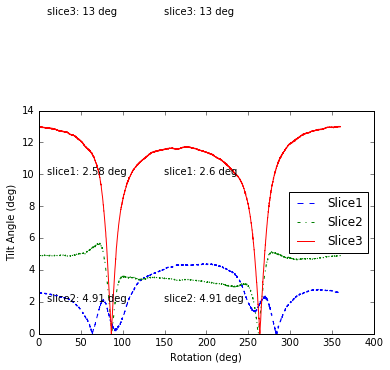

In [151]:
plt.plot(data_slice1_df['Rotation [deg]'],data_slice1_df['degz_xyplane (deg)'],'--',
         data_slice2_df['Rotation [deg]'],data_slice2_df['degz_xyplane (deg)'],'-.',
         data_slice3_df['Rotation [deg]'],data_slice3_df['degz_xyplane (deg)'],'-',label='line 1')
plt.ylabel('Tilt Angle (deg)')
plt.xlabel('Rotation (deg)')
plt.legend(['Slice1','Slice2','Slice3'],loc='best')
plt.text(10, 10,'slice1: '+str(format(data_slice1_df['degz_xyplane (deg)'][0],'.3g'))+' deg')
plt.text(10, 2,'slice2: '+str(format(data_slice2_df['degz_xyplane (deg)'][0],'.3g'))+' deg')
plt.text(10, 20,'slice3: '+str(format(data_slice3_df['degz_xyplane (deg)'][0],'.3g'))+' deg')

plt.text(150, 10,'slice1: '+str(format(data_slice1_df['degz_xyplane (deg)'][int(len(data)/3)-1],'.3g'))+' deg')
plt.text(150, 2,'slice2: '+str(format(data_slice2_df['degz_xyplane (deg)'][int(len(data)/3)-1],'.3g'))+' deg')
plt.text(150, 20,'slice3: '+str(format(data_slice3_df['degz_xyplane (deg)'][int(len(data)/3)-1],'.3g'))+' deg')



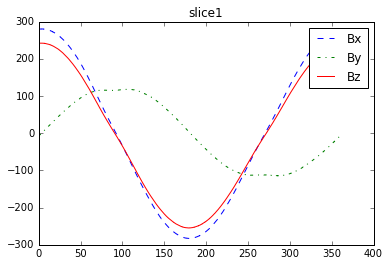

In [58]:
plt.plot(data_slice1_df['Rotation [deg]'],data_slice1_df['Bx [mT]'],'--',
         data_slice1_df['Rotation [deg]'],data_slice1_df['By [mT]'],'-.',
         data_slice1_df['Rotation [deg]'],data_slice1_df['Bz [mT]'],'-',label='line 1')
plt.legend(['Bx','By','Bz'])
plt.title("slice1")

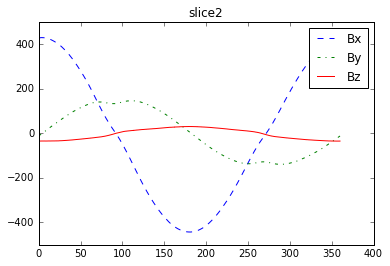

In [59]:
plt.plot(data_slice2_df['Rotation [deg]'],data_slice2_df['Bx [mT]'],'--',
         data_slice2_df['Rotation [deg]'],data_slice2_df['By [mT]'],'-.',
         data_slice2_df['Rotation [deg]'],data_slice2_df['Bz [mT]'],'-',label='line 1')
plt.legend(['Bx','By','Bz'])
plt.title("slice2")

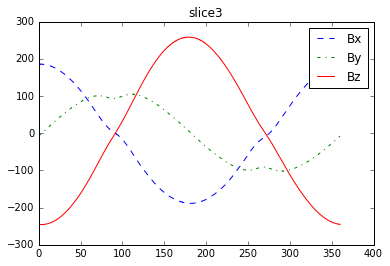

In [60]:
plt.plot(data_slice3_df['Rotation [deg]'],data_slice3_df['Bx [mT]'],'--',
         data_slice3_df['Rotation [deg]'],data_slice3_df['By [mT]'],'-.',
         data_slice3_df['Rotation [deg]'],data_slice3_df['Bz [mT]'],'-',label='line 1')
plt.legend(['Bx','By','Bz'])
plt.title("slice3")